# Project: Wrangling and Analyze Data

Importing required libraries for the project

In [2]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
df_tae = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"  # Replace this with the actual URL of the .tsv file

response = requests.get(url)

if response.status_code == 200:
    # Assuming the file is a text file, you can save it using the following
    with open("image_predictions.tsv", "wb") as file:
        file.write(response.content)
    print("File downloaded successfully.")
else:
    print(f"Failed to download file. Status code: {response.status_code}")
df_ip = pd.read_csv('image_predictions.tsv', sep='\t')

File downloaded successfully.


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_tae.tweet_id.values
len(tweet_ids)

2356

In [6]:
df_list = []
with open('tweet-json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [7]:
df_td = pd.DataFrame(df_list, columns = ['id','retweet_count','favorite_count'])
df_td.rename(columns={'id': 'tweet_id'}, inplace=True)

## The 3 dataframes are:
- df_tae - data from provided twitter-archive-enhanced.csv
- df_ip - data from gathered image-predictions.tsv
- df_td - data from twitter api using tweepy, tweet-json.txt

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## I will check out the twitter-archive-enhanced dataframe first

In [8]:
df_tae

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN


In [9]:
df_tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

I will go through each column and check for any issues.

In [10]:
df_tae.tweet_id

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: int64

In [11]:
df_tae.tweet_id.nunique()

2356

no duplicates and everything looks in the same format, this column is done

In [12]:
df_tae.in_reply_to_status_id.dropna()

30      8.862664e+17
55      8.816070e+17
64      8.795538e+17
113     8.707262e+17
148     8.634256e+17
            ...     
2038    6.715449e+17
2149    6.693544e+17
2169    6.678065e+17
2189    6.689207e+17
2298    6.670655e+17
Name: in_reply_to_status_id, Length: 78, dtype: float64

This column is good

In [13]:
df_tae.in_reply_to_user_id.dropna()

30      2.281182e+09
55      4.738443e+07
64      3.105441e+09
113     1.648776e+07
148     7.759620e+07
            ...     
2038    4.196984e+09
2149    4.196984e+09
2169    4.196984e+09
2189    2.143566e+07
2298    4.196984e+09
Name: in_reply_to_user_id, Length: 78, dtype: float64

This column is good

In [14]:
df_tae.timestamp

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
                  ...            
2351    2015-11-16 00:24:50 +0000
2352    2015-11-16 00:04:52 +0000
2353    2015-11-15 23:21:54 +0000
2354    2015-11-15 23:05:30 +0000
2355    2015-11-15 22:32:08 +0000
Name: timestamp, Length: 2356, dtype: object

In [15]:
(df_tae['timestamp'].apply(type)).unique()

array([<class 'str'>], dtype=object)

This column is good

In [16]:
df_tae.source

0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
                              ...                        
2351    <a href="http://twitter.com/download/iphone" r...
2352    <a href="http://twitter.com/download/iphone" r...
2353    <a href="http://twitter.com/download/iphone" r...
2354    <a href="http://twitter.com/download/iphone" r...
2355    <a href="http://twitter.com/download/iphone" r...
Name: source, Length: 2356, dtype: object

In [17]:
df_tae.source.value_counts()

source
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: count, dtype: int64

In [18]:
(df_tae['source'].apply(type)).unique()

array([<class 'str'>], dtype=object)

This column is fine

In [19]:
df_tae.text

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2356, dtype: object

In [20]:
(df_tae['text'].apply(type)).unique()

array([<class 'str'>], dtype=object)

In [21]:
df_tae['text'][2117]

'Meet Herb. 12/10 https://t.co/tLRyYvCci3'

In [22]:
df_tae['text'][2120]

"Meet Scooter. He's ready for his first day of middle school. Remarkable tongue. 12/10 https://t.co/1DJfHmfBQN"

It appeared that index 2117 was indented but when I printed it out it looks fine. I did notice that some rows use '' and others use "". Other than that this column looks fine.

In [23]:
df_tae.retweeted_status_id

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2351   NaN
2352   NaN
2353   NaN
2354   NaN
2355   NaN
Name: retweeted_status_id, Length: 2356, dtype: float64

In [24]:
df_tae.retweeted_status_id.dropna()

19      8.874740e+17
32      8.860537e+17
36      8.305833e+17
68      8.780576e+17
73      8.782815e+17
            ...     
1023    6.678667e+17
1043    6.671383e+17
1242    7.119983e+17
2259    6.675487e+17
2260    6.675484e+17
Name: retweeted_status_id, Length: 181, dtype: float64

This column is done.

In [25]:
df_tae.retweeted_status_user_id

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2351   NaN
2352   NaN
2353   NaN
2354   NaN
2355   NaN
Name: retweeted_status_user_id, Length: 2356, dtype: float64

In [26]:
df_tae.retweeted_status_user_id.dropna()

19      4.196984e+09
32      1.960740e+07
36      4.196984e+09
68      4.196984e+09
73      4.196984e+09
            ...     
1023    4.196984e+09
1043    4.196984e+09
1242    7.832140e+05
2259    4.296832e+09
2260    4.296832e+09
Name: retweeted_status_user_id, Length: 181, dtype: float64

This column is done.

In [27]:
df_tae.retweeted_status_timestamp

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2351    NaN
2352    NaN
2353    NaN
2354    NaN
2355    NaN
Name: retweeted_status_timestamp, Length: 2356, dtype: object

In [28]:
df_rst = df_tae.retweeted_status_timestamp.dropna()
df_rst

19      2017-07-19 00:47:34 +0000
32      2017-07-15 02:44:07 +0000
36      2017-02-12 01:04:29 +0000
68      2017-06-23 01:10:23 +0000
73      2017-06-23 16:00:04 +0000
                  ...            
1023    2015-11-21 00:46:50 +0000
1043    2015-11-19 00:32:12 +0000
1242    2016-03-21 19:29:52 +0000
2259    2015-11-20 03:43:06 +0000
2260    2015-11-20 03:41:59 +0000
Name: retweeted_status_timestamp, Length: 181, dtype: object

In [29]:
(df_rst.apply(type)).unique()

array([<class 'str'>], dtype=object)

The 'timestamp' column should be a datetime data type. This column is done.

In [30]:
df_tae.expanded_urls

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
                              ...                        
2351    https://twitter.com/dog_rates/status/666049248...
2352    https://twitter.com/dog_rates/status/666044226...
2353    https://twitter.com/dog_rates/status/666033412...
2354    https://twitter.com/dog_rates/status/666029285...
2355    https://twitter.com/dog_rates/status/666020888...
Name: expanded_urls, Length: 2356, dtype: object

In [31]:
df_eu = df_tae.expanded_urls.dropna()
df_eu

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
                              ...                        
2351    https://twitter.com/dog_rates/status/666049248...
2352    https://twitter.com/dog_rates/status/666044226...
2353    https://twitter.com/dog_rates/status/666033412...
2354    https://twitter.com/dog_rates/status/666029285...
2355    https://twitter.com/dog_rates/status/666020888...
Name: expanded_urls, Length: 2297, dtype: object

In [32]:
(df_eu.apply(type)).unique()

array([<class 'str'>], dtype=object)

This column is done.

In [33]:
df_tae.rating_numerator 

0       13
1       13
2       12
3       13
4       12
        ..
2351     5
2352     6
2353     9
2354     7
2355     8
Name: rating_numerator, Length: 2356, dtype: int64

This column is done.

In [34]:
df_tae.rating_denominator

0       10
1       10
2       10
3       10
4       10
        ..
2351    10
2352    10
2353    10
2354    10
2355    10
Name: rating_denominator, Length: 2356, dtype: int64

This column is done.

In [35]:
df_tae.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351         NaN
2352           a
2353           a
2354           a
2355         NaN
Name: name, Length: 2356, dtype: object

In [36]:
df_names = df_tae[df_tae.name.str.islower() == True]
df_names.name.value_counts()

name
a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: count, dtype: int64

There's a bunch of unacceptable names

In [37]:
df_name_nonull = df_tae.name.dropna()

In [38]:
(df_name_nonull.apply(type)).unique()

array([<class 'str'>], dtype=object)

All the usable values are the correct data type, this column is done.

In [39]:
df_tae.doggo

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2351    NaN
2352    NaN
2353    NaN
2354    NaN
2355    NaN
Name: doggo, Length: 2356, dtype: object

In [40]:
df_doggo_nonull = df_tae.doggo.dropna()

In [41]:
(df_doggo_nonull.apply(type)).unique()

array([<class 'str'>], dtype=object)

This column is done.

In [42]:
df_floofer_nonull = df_tae.floofer.dropna()

In [43]:
df_floofer_nonull

46      floofer
200     floofer
582     floofer
774     floofer
984     floofer
1022    floofer
1091    floofer
1110    floofer
1534    floofer
1614    floofer
Name: floofer, dtype: object

In [44]:
(df_floofer_nonull.apply(type)).unique()

array([<class 'str'>], dtype=object)

This column is done.

In [45]:
df_pupper_nonull = df_tae.pupper.dropna()

In [46]:
df_pupper_nonull

29      pupper
49      pupper
56      pupper
78      pupper
82      pupper
         ...  
1995    pupper
2002    pupper
2009    pupper
2015    pupper
2017    pupper
Name: pupper, Length: 257, dtype: object

In [47]:
(df_pupper_nonull.apply(type)).unique()

array([<class 'str'>], dtype=object)

This column is done.

In [48]:
df_puppo_nonull = df_tae.puppo.dropna()

In [49]:
df_puppo_nonull

12      puppo
14      puppo
71      puppo
94      puppo
129     puppo
168     puppo
191     puppo
395     puppo
397     puppo
398     puppo
413     puppo
438     puppo
439     puppo
469     puppo
546     puppo
554     puppo
567     puppo
615     puppo
643     puppo
663     puppo
689     puppo
701     puppo
713     puppo
736     puppo
922     puppo
947     puppo
961     puppo
1035    puppo
1048    puppo
1083    puppo
Name: puppo, dtype: object

In [50]:
(df_puppo_nonull.apply(type)).unique()

array([<class 'str'>], dtype=object)

This column is done.

To recap for this data source, the issues I got were:
- The 'text' column had some rows use '' and others use "".
- The 'name' column had a bunch of unnacceptable names.
- The 'timestamp' column should be a datetime data type.
- Retweets need to be removed.
- Dog stages should be put into single column

## Now I will move on to image-predictions.tsv

In [51]:
df_ip

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


There are rows where the top prediction isn't a dog breed. There are also rows where the the top 3 predictions are all non dog breeds.

In [52]:
df_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


I think columns 3-11 should be more descriptive of what they contain. I'll will go through each of the columns in the dataset and check for issues.

In [53]:
df_ip.tweet_id

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
               ...        
2070    891327558926688256
2071    891689557279858688
2072    891815181378084864
2073    892177421306343426
2074    892420643555336193
Name: tweet_id, Length: 2075, dtype: int64

In [54]:
df_ip.tweet_id.nunique()

2075

This column is done.

In [55]:
df_ip.jpg_url

0       https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg
1       https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
2       https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
3       https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg
4       https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg
                             ...                       
2070    https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
2071    https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
2072    https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
2073    https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2074    https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
Name: jpg_url, Length: 2075, dtype: object

In [56]:
df_ip.jpg_url.nunique()

2009

There seems to be some duplicates.

In [57]:
(df_ip.jpg_url.apply(type)).unique()

array([<class 'str'>], dtype=object)

In [58]:
df_ip.jpg_url.value_counts()

jpg_url
https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg                                            1
https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg                                            1
https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg                                            1
https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg                                            1
https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg               

In [59]:
df_ip[df_ip.jpg_url.duplicated(keep=False) == True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1970,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True


Yes there are duplicates. Someone reposted the same image. They have different tweet_id's. This column is done.

In [60]:
df_ip.img_num

0       1
1       1
2       1
3       1
4       1
       ..
2070    2
2071    1
2072    1
2073    1
2074    1
Name: img_num, Length: 2075, dtype: int64

The column is good.

In [61]:
df_ip.p1

0       Welsh_springer_spaniel
1                      redbone
2              German_shepherd
3          Rhodesian_ridgeback
4           miniature_pinscher
                 ...          
2070                    basset
2071               paper_towel
2072                 Chihuahua
2073                 Chihuahua
2074                    orange
Name: p1, Length: 2075, dtype: object

There appears to be a lot of non dog breeds.

In [62]:
(df_ip.p1.apply(type)).unique()

array([<class 'str'>], dtype=object)

This column is good.

In [63]:
df_ip.p1_conf

0       0.465074
1       0.506826
2       0.596461
3       0.408143
4       0.560311
          ...   
2070    0.555712
2071    0.170278
2072    0.716012
2073    0.323581
2074    0.097049
Name: p1_conf, Length: 2075, dtype: float64

This column is good.

In [64]:
df_ip.p1_dog

0        True
1        True
2        True
3        True
4        True
        ...  
2070     True
2071    False
2072     True
2073     True
2074    False
Name: p1_dog, Length: 2075, dtype: bool

This column is good.

In [65]:
df_ip.p2

0                   collie
1       miniature_pinscher
2                 malinois
3                  redbone
4               Rottweiler
               ...        
2070      English_springer
2071    Labrador_retriever
2072              malamute
2073              Pekinese
2074                 bagel
Name: p2, Length: 2075, dtype: object

There appears to be a lot of non dog breeds.

In [66]:
(df_ip.p2.apply(type)).unique()

array([<class 'str'>], dtype=object)

This column is good.

In [67]:
df_ip.p2_conf

0       0.156665
1       0.074192
2       0.138584
3       0.360687
4       0.243682
          ...   
2070    0.225770
2071    0.168086
2072    0.078253
2073    0.090647
2074    0.085851
Name: p2_conf, Length: 2075, dtype: float64

I think this should be in the same as p1_conf. Other than that, this column is good.

In [68]:
df_ip.p2_dog

0        True
1        True
2        True
3        True
4        True
        ...  
2070     True
2071     True
2072     True
2073     True
2074    False
Name: p2_dog, Length: 2075, dtype: bool

This column is good.

In [69]:
df_ip.p3

0                 Shetland_sheepdog
1               Rhodesian_ridgeback
2                        bloodhound
3                miniature_pinscher
4                          Doberman
                   ...             
2070    German_short-haired_pointer
2071                        spatula
2072                         kelpie
2073                       papillon
2074                         banana
Name: p3, Length: 2075, dtype: object

There appears to be a lot of non dog breeds.

In [70]:
(df_ip.p3.apply(type)).unique()

array([<class 'str'>], dtype=object)

This column is good.

In [71]:
df_ip.p3_conf

0       0.061428
1       0.072010
2       0.116197
3       0.222752
4       0.154629
          ...   
2070    0.175219
2071    0.040836
2072    0.031379
2073    0.068957
2074    0.076110
Name: p3_conf, Length: 2075, dtype: float64

I think this should be in the same as p1_conf. Other than that, this column is good.

In [72]:
df_ip.p3_dog

0        True
1        True
2        True
3        True
4        True
        ...  
2070     True
2071    False
2072     True
2073     True
2074    False
Name: p3_dog, Length: 2075, dtype: bool

This column is good.

To recap for this data source, the issues I got were:
- There are rows where the top prediction isn't a dog breed. There are also rows where the the top 3 predictions are all non dog breeds.
- Columns 3-11 should have more descriptive names.
- jpg_url column have duplicate images. They are unique tweets with same image.
- p1,p2,p3 all have non dog breeds listed
- p2_conf and p3_conf should be in the same format as p1_conf

## Now I will move on to tweet-json.txt

In [73]:
df_td

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [74]:
df_td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [75]:
df_td.tweet_id

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2349    666049248165822465
2350    666044226329800704
2351    666033412701032449
2352    666029285002620928
2353    666020888022790149
Name: tweet_id, Length: 2354, dtype: int64

In [76]:
df_td.tweet_id.nunique()

2354

This column is good.

In [77]:
df_td.retweet_count

0       8853
1       6514
2       4328
3       8964
4       9774
        ... 
2349      41
2350     147
2351      47
2352      48
2353     532
Name: retweet_count, Length: 2354, dtype: int64

This column is good.

In [78]:
df_td.favorite_count

0       39467
1       33819
2       25461
3       42908
4       41048
        ...  
2349      111
2350      311
2351      128
2352      132
2353     2535
Name: favorite_count, Length: 2354, dtype: int64

This column is good.

To recap for this data source, I found no issues.

### Quality issues
In twitter-archive-enhanced.csv:
1. The 'text' column has some rows use '' and others use "".

2. The 'name' column has a bunch of unacceptable names.

3. The 'timestamp' column should be a datetime data type.

4. Retweets need to be removed.

In image-predictions.tsv:

5. There are rows where the top prediction isn't a dog breed. There are also rows where the the top 3 predictions are all non dog breeds.

6. The 'jpg_url' column has duplicate images. They are unique tweets with the same image.

7. Theh'p1' column has non dog breeds listed.

8. The 'p2' column has non dog breeds listed.

9. The 'p3' column has non dog breeds listed.

10. The 'p2_conf' column should be in the same format as the 'p1_conf' column.

11. The 'p3_conf' column should be in the same format as the 'p1_conf' column.

12. Columns 3-11 should have more descriptive names.n.

### Tidiness issues
In twitter-archive-enhanced.csv:
1. Dog stages should be put into single column.

In General:

2. Merge all 3 data sources into one using the common tweet_id column

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [79]:
# Make copies of original pieces of data
df_tae_copy = df_tae.copy()
df_ip_copy = df_ip.copy()
df_td_copy = df_td.copy()

### Issue #1:

#### Define: twitter-archive-enhanced.csv - The 'text' column has some rows use ' ' and others use " ". I'm going to make them all uniform.

In [80]:
df_tae_copy.text[1]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

In [81]:
df_tae_copy.text[5]

"Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh"

#### Code

In [82]:
df_tae_copy['text'] = df_tae_copy['text'].str.replace("'", '"')

#### Test

In [83]:
df_tae_copy.text[1]

'This is Tilly. She"s just checking pup on you. Hopes you"re doing ok. If not, she"s available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV'

In [84]:
df_tae_copy.text[5]

'Here we have a majestic great white breaching off South Africa"s coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh'

As we can see, the columns now both have single quotes.

### Issue #2:

#### Define: twitter-archive-enhanced.csv - The 'name' column has a bunch of unacceptable names. I'm going to remove them.

#### Code

In [85]:
df_badnames = df_tae_copy[df_tae_copy.name.str.islower() == True]
df_badnames.name.value_counts()

name
a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: count, dtype: int64

In [86]:
mask = df_tae_copy['name'].isin(df_badnames['name'])
df_tae_copy.loc[mask, 'name'] = np.nan
df_tae_copy['name'] = df_tae_copy['name'].fillna('')

#### Test

In [87]:
df_tae_copy.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351            
2352            
2353            
2354            
2355            
Name: name, Length: 2356, dtype: object

All the unacceptable names are gone

### Issue #3:

#### Define: twitter-archive-enhanced.csv - The 'timestamp' column should be a datetime data type.

#### Code

In [88]:
df_tae_copy['timestamp'] = pd.to_datetime(df_tae_copy['timestamp'])

#### Test

In [89]:
df_tae_copy['timestamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype              
--------------  -----              
2356 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 18.5 KB


Now the column had a datetime dtype.

### Issue #4:

#### Define: twitter-archive-enhanced.csv - Retweets need to be removed.

#### Code

In [90]:
df_tae_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [91]:
df_tae_copy = df_tae_copy[df_tae_copy.retweeted_status_id.isnull()]
df_tae_copy = df_tae_copy[df_tae_copy.retweeted_status_user_id.isnull()]
df_tae_copy = df_tae_copy[df_tae_copy.retweeted_status_timestamp.isnull()]

#### Test

In [92]:
df_tae_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64              
 

All retweets are gone.

### Issue #5:

#### Define: image-predictions.tsv - There are rows where the top prediction isn't a dog breed. There are also  rows where the the top 3 predictions are all non dog breeds I'm going to make 3 columns. The first will be true/false whether theres a valid prediction. The second is the top valid prediction. The third is the confidence interval of the top valid prediciton.

#### Code

In [93]:
df_ip_copy['valid_prediction'] = (df_ip_copy['p1_dog']) | (df_ip_copy['p2_dog']) | (df_ip_copy['p3_dog'])

In [94]:
conditions = [df_ip_copy['p1_dog'], df_ip_copy['p2_dog'], df_ip_copy['p3_dog']]
values = [df_ip_copy['p1'], df_ip_copy['p2'], df_ip_copy['p3']]
df_ip_copy['top_valid_prediction'] = np.select(conditions, values, default='')

In [95]:
values2 = [df_ip_copy['p1_conf'], df_ip_copy['p2_conf'], df_ip_copy['p3_conf']]
df_ip_copy['top_valid_p_confidence'] = np.select(conditions, values2, default='')
df_ip_copy['top_valid_p_confidence'] = df_ip_copy['top_valid_p_confidence'].apply(lambda x: '{:.6f}'.format(float(x)) if x else '')

#### Test

In [96]:
df_ip_copy

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,valid_prediction,top_valid_prediction,top_valid_p_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,True,miniature_pinscher,0.560311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,True,basset,0.555712
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,True,Labrador_retriever,0.168086
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,True,Chihuahua,0.716012
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,True,Chihuahua,0.323581


The columns all work.

### Issue #6:

#### Define: image-predictions.tsv - The 'jpg_url' column has duplicate images. They are unique tweets with  the same image Im going to drop rows with duplicates..

#### Code

In [97]:
df_ip_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweet_id                2075 non-null   int64  
 1   jpg_url                 2075 non-null   object 
 2   img_num                 2075 non-null   int64  
 3   p1                      2075 non-null   object 
 4   p1_conf                 2075 non-null   float64
 5   p1_dog                  2075 non-null   bool   
 6   p2                      2075 non-null   object 
 7   p2_conf                 2075 non-null   float64
 8   p2_dog                  2075 non-null   bool   
 9   p3                      2075 non-null   object 
 10  p3_conf                 2075 non-null   float64
 11  p3_dog                  2075 non-null   bool   
 12  valid_prediction        2075 non-null   bool   
 13  top_valid_prediction    2075 non-null   object 
 14  top_valid_p_confidence  2075 non-null   

In [98]:
df_ip_copy.drop_duplicates(subset=['jpg_url'],keep="last", inplace=True)

#### Test

In [99]:
df_ip_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 0 to 2074
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweet_id                2009 non-null   int64  
 1   jpg_url                 2009 non-null   object 
 2   img_num                 2009 non-null   int64  
 3   p1                      2009 non-null   object 
 4   p1_conf                 2009 non-null   float64
 5   p1_dog                  2009 non-null   bool   
 6   p2                      2009 non-null   object 
 7   p2_conf                 2009 non-null   float64
 8   p2_dog                  2009 non-null   bool   
 9   p3                      2009 non-null   object 
 10  p3_conf                 2009 non-null   float64
 11  p3_dog                  2009 non-null   bool   
 12  valid_prediction        2009 non-null   bool   
 13  top_valid_prediction    2009 non-null   object 
 14  top_valid_p_confidence  2009 non-null   objec

All duplicate rows have been dropped. I kept the row who first posted the image.

### Issue #7:

#### Define: image-predictions.tsv - The 'p1' column has non dog breeds listed. I'll remove the non dog breeds and the corresponding dog and conf data. I then will drop the dog column since it will all be True.

#### Code

In [100]:
df_ip_copy[['p1','p1_conf','p1_dog']]

,p1,p1_conf,p1_dog
0,Welsh_springer_spaniel,0.465074,True
1,redbone,0.506826,True
2,German_shepherd,0.596461,True
3,Rhodesian_ridgeback,0.408143,True
4,miniature_pinscher,0.560311,True
...,...,...,...
2070,basset,0.555712,True
2071,paper_towel,0.170278,False
2072,Chihuahua,0.716012,True
2073,Chihuahua,0.323581,True


In [101]:
conditions = [df_ip_copy['p1_dog']]
values = [df_ip_copy['p1']]
df_ip_copy['p1'] = np.select(conditions, values, default='')

In [102]:
conditions = [df_ip_copy['p1_dog']]
values = [df_ip_copy['p1_conf']]
df_ip_copy['p1_conf'] = np.select(conditions, values, default='')

In [103]:
conditions = [df_ip_copy['p1_dog']]
values = [df_ip_copy['p1_dog']]
df_ip_copy['p1_dog'] = np.select(conditions, values, default='')

In [104]:
df_ip_copy = df_ip_copy.drop(columns='p1_dog')

#### Test

In [105]:
df_ip_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,valid_prediction,top_valid_prediction,top_valid_p_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,collie,0.156665,True,Shetland_sheepdog,0.061428,True,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,malinois,0.138584,True,bloodhound,0.116197,True,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,redbone,0.360687,True,miniature_pinscher,0.222752,True,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,Rottweiler,0.243682,True,Doberman,0.154629,True,True,miniature_pinscher,0.560311


All non dog breeds were removed.

### Issue #8:

#### Define: image-predictions.tsv - The 'p2' column has non dog breeds listed. I'll remove the non dog breeds and the corresponding dog and conf data. I then will drop the dog column since it will all be True.

#### Code

In [106]:
conditions = [df_ip_copy['p2_dog']]
values = [df_ip_copy['p2']]
df_ip_copy['p2'] = np.select(conditions, values, default='')

In [107]:
conditions = [df_ip_copy['p2_dog']]
values = [df_ip_copy['p2_conf']]
df_ip_copy['p2_conf'] = np.select(conditions, values, default='')

In [108]:
conditions = [df_ip_copy['p2_dog']]
values = [df_ip_copy['p2_dog']]
df_ip_copy['p2_dog'] = np.select(conditions, values, default='')

In [109]:
df_ip_copy = df_ip_copy.drop(columns='p2_dog')

#### Test

In [110]:
df_ip_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,p3_dog,valid_prediction,top_valid_prediction,top_valid_p_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,collie,0.156665,Shetland_sheepdog,0.061428,True,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,miniature_pinscher,0.0741916999999999,Rhodesian_ridgeback,0.072010,True,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,malinois,0.1385839999999999,bloodhound,0.116197,True,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,redbone,0.360687,miniature_pinscher,0.222752,True,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,Rottweiler,0.243682,Doberman,0.154629,True,True,miniature_pinscher,0.560311


All non dog breeds were removed.

### Issue #9:

#### Define: image-predictions.tsv - The 'p3' column has non dog breeds listed. I'll remove the non dog breeds and the corresponding dog and conf data. I then will drop the dog column since it will all be True.

#### Code

In [111]:
conditions = [df_ip_copy['p3_dog']]
values = [df_ip_copy['p3']]
df_ip_copy['p3'] = np.select(conditions, values, default='')

In [112]:
conditions = [df_ip_copy['p3_dog']]
values = [df_ip_copy['p3_conf']]
df_ip_copy['p3_conf'] = np.select(conditions, values, default='')

In [113]:
conditions = [df_ip_copy['p3_dog']]
values = [df_ip_copy['p3_dog']]
df_ip_copy['p3_dog'] = np.select(conditions, values, default='')

In [114]:
df_ip_copy = df_ip_copy.drop(columns='p3_dog')

#### Test

In [115]:
df_ip_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,valid_prediction,top_valid_prediction,top_valid_p_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,collie,0.156665,Shetland_sheepdog,0.0614285,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,miniature_pinscher,0.0741916999999999,Rhodesian_ridgeback,0.07201,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,malinois,0.1385839999999999,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,redbone,0.360687,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,Rottweiler,0.243682,Doberman,0.154629,True,miniature_pinscher,0.560311


All non dog breeds were removed.

### Issue #10:

#### Define: image-predictions.tsv - The 'p2_conf' column should be in the same format as the 'p1_conf' column.

#### Code

In [116]:
df_ip_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,valid_prediction,top_valid_prediction,top_valid_p_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,collie,0.156665,Shetland_sheepdog,0.0614285,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,miniature_pinscher,0.0741916999999999,Rhodesian_ridgeback,0.07201,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,malinois,0.1385839999999999,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,redbone,0.360687,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,Rottweiler,0.243682,Doberman,0.154629,True,miniature_pinscher,0.560311


In [117]:
df_ip_copy['p2_conf'] = df_ip_copy['p2_conf'].apply(lambda x: '{:.6f}'.format(float(x)) if x else '')

#### Test

In [118]:
df_ip_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,valid_prediction,top_valid_prediction,top_valid_p_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,collie,0.156665,Shetland_sheepdog,0.0614285,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,miniature_pinscher,0.074192,Rhodesian_ridgeback,0.07201,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,malinois,0.138584,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,redbone,0.360687,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,Rottweiler,0.243682,Doberman,0.154629,True,miniature_pinscher,0.560311


### Issue #11: 

#### Define: image-predictions.tsv - The 'p3_conf' column should be in the same format as the 'p1_conf' column.

#### Code

In [119]:
df_ip_copy['p3_conf'] = df_ip_copy['p3_conf'].apply(lambda x: '{:.6f}'.format(float(x)) if x else '')

#### Test

In [120]:
df_ip_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,valid_prediction,top_valid_prediction,top_valid_p_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,collie,0.156665,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,miniature_pinscher,0.074192,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,malinois,0.138584,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,redbone,0.360687,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,Rottweiler,0.243682,Doberman,0.154629,True,miniature_pinscher,0.560311


### Issue #12:

#### Define: image-predictions.tsv - Columns 3-11 should have more descriptive names. Now it's only columns 3-8.

#### Code

In [121]:
df_ip_copy = df_ip_copy.rename(columns={'p1': 'first_prediction'})
df_ip_copy = df_ip_copy.rename(columns={'p1_conf': 'first_p_confidence'})
df_ip_copy = df_ip_copy.rename(columns={'p2': 'second_prediction'})
df_ip_copy = df_ip_copy.rename(columns={'p2_conf': 'second_p_confidence'})
df_ip_copy = df_ip_copy.rename(columns={'p3': 'third_prediction'})
df_ip_copy = df_ip_copy.rename(columns={'p3_conf': 'third_p_confidence'})

#### Test

In [122]:
df_ip_copy.head()

,tweet_id,jpg_url,img_num,first_prediction,first_p_confidence,second_prediction,second_p_confidence,third_prediction,third_p_confidence,valid_prediction,top_valid_prediction,top_valid_p_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,collie,0.156665,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,miniature_pinscher,0.074192,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,malinois,0.138584,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,redbone,0.360687,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,Rottweiler,0.243682,Doberman,0.154629,True,miniature_pinscher,0.560311


### Issue #13:

#### Define: twitter-archive-enhanced.csv - Dog stages should be put into single column.

#### Code

In [123]:
# First replace None in stage columns with empty string as follows.
df_tae_copy.doggo.replace(np.nan, '', inplace=True)  # Like this do replacements for all four stages
df_tae_copy.floofer.replace(np.nan, '', inplace=True)
df_tae_copy.pupper.replace(np.nan, '', inplace=True)
df_tae_copy.puppo.replace(np.nan, '', inplace=True)

# Then combine stage columns.
df_tae_copy['stage'] = df_tae_copy.doggo + df_tae_copy.floofer + df_tae_copy.pupper + df_tae_copy.puppo

# Then format entries with multiple dog stages which appeared like doggopupper.
df_tae_copy.loc[df_tae_copy.stage == 'doggopupper', 'stage'] = 'doggo, pupper' 
df_tae_copy.loc[df_tae_copy.stage == 'doggopuppo', 'stage'] = 'doggo, puppo' 
df_tae_copy.loc[df_tae_copy.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

#### Test

In [124]:
df_tae_copy.stage.value_counts()

stage
                  1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: count, dtype: int64

In [125]:
# dropping doggo, floofer, pupper, puppo columns
df_tae_copy = df_tae_copy.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

In [126]:
df_tae_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Phineas. He""s a mystical boy. Only eve...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Tilly. She""s just checking pup on you....",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [127]:
df_master = pd.merge(df_tae_copy, df_ip_copy, on='tweet_id', how='inner')
df_master = pd.merge(df_master, df_td_copy, on='tweet_id', how='inner')
df_master.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [128]:
df = pd.read_csv('twitter_archive_master.csv')
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,first_p_confidence,second_prediction,second_p_confidence,third_prediction,third_p_confidence,valid_prediction,top_valid_prediction,top_valid_p_confidence,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Phineas. He""s a mystical boy. Only eve...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Tilly. She""s just checking pup on you....",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,Pekinese,0.090647,papillon,0.068957,True,Chihuahua,0.323581,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,malamute,0.078253,kelpie,0.031379,True,Chihuahua,0.716012,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,NaN,Labrador_retriever,0.168086,NaN,NaN,True,Labrador_retriever,0.168086,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,English_springer,0.225770,German_short-haired_pointer,0.175219,True,basset,0.555712,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,0.560311,Rottweiler,0.243682,Doberman,0.154629,True,miniature_pinscher,0.560311,41,111
1924,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,0.408143,redbone,0.360687,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143,147,311
1925,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,0.596461,malinois,0.138584,bloodhound,0.116197,True,German_shepherd,0.596461,47,128
1926,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,0.506826,miniature_pinscher,0.074192,Rhodesian_ridgeback,0.072010,True,redbone,0.506826,48,132


In [129]:
df.name.value_counts()

name
Charlie       11
Cooper        10
Lucy          10
Oliver        10
Tucker         8
              ..
Rocco          1
Fido           1
Emma           1
Spencer        1
Christoper     1
Name: count, Length: 889, dtype: int64

In [130]:
df.top_valid_prediction.value_counts()

top_valid_prediction
golden_retriever        143
Labrador_retriever      103
Pembroke                 94
Chihuahua                87
pug                      60
                       ... 
silky_terrier             1
Scotch_terrier            1
Bouvier_des_Flandres      1
clumber                   1
Irish_wolfhound           1
Name: count, Length: 113, dtype: int64

In [131]:
sorted_df = df.sort_values(by='retweet_count', ascending=False)
sorted_df.head(1)[['retweet_count','jpg_url','name','top_valid_prediction','text']]

,retweet_count,jpg_url,name,top_valid_prediction,text
733,79515,https://pbs.twimg.com/ext_tw_video_thumb/74423...,NaN,Labrador_retriever,"Here""s a doggo realizing you can stand in a po..."


In [132]:
sorted_df = df.sort_values(by='favorite_count', ascending=False)
sorted_df.head(1)[['favorite_count','jpg_url','name','top_valid_prediction','text']]

,favorite_count,jpg_url,name,top_valid_prediction,text
304,132810,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,NaN,Lakeland_terrier,"Here""s a super supportive puppo participating ..."


### Insights:
1. The most retweeted post is a Labrador Retriever in a pool.

2. The most favorited post is a Lakeland Terrier at a march.

3. The most popular dog name is Charlie in this dataset.

4. The most popular dog breed are Golden Retrievers in this dataset.

5. Retweets and favorites have a strong correlation.

6. The WeRateDogs twitter had a lot of tweets at the beginning of 2016. It then had a drastic decline in early 2016. It had a steady level of tweets the rest of 2016. It started declining again in 2017.

7. The majority of tweets are of puppers.

### Visualization

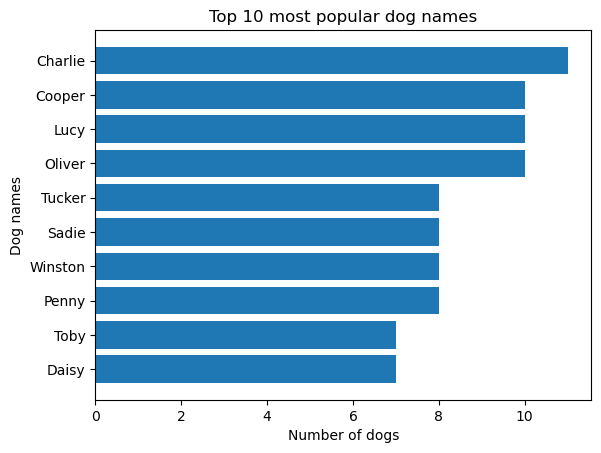

In [133]:
names = df.name.value_counts()
top10_r = names.iloc[:10][::-1]
plt.barh(top10_r.index,top10_r.values)
plt.xlabel('Number of dogs')
plt.ylabel('Dog names')
plt.title('Top 10 most popular dog names')
plt.show();

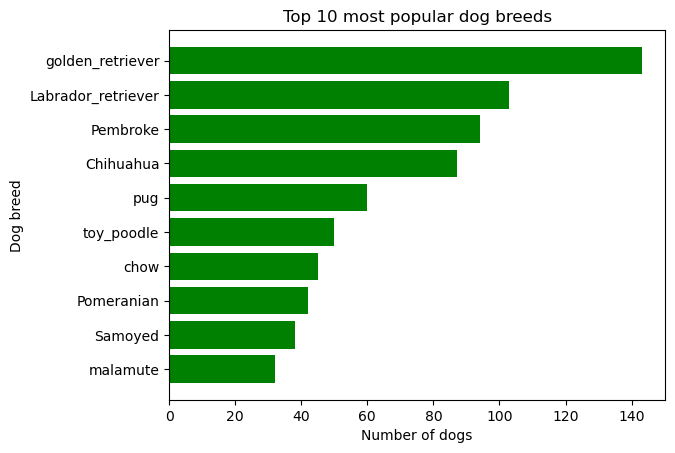

In [134]:
tvp = df.top_valid_prediction.value_counts()
top10_r = tvp.iloc[:10][::-1]
plt.barh(top10_r.index,top10_r.values, color='green')
plt.xlabel('Number of dogs')
plt.ylabel('Dog breed')
plt.title('Top 10 most popular dog breeds')
plt.show();

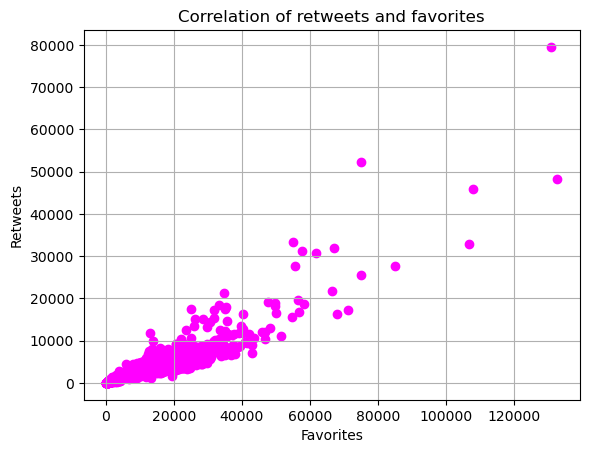

In [135]:
plt.scatter(df['favorite_count'], df['retweet_count'], color='magenta')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Correlation of retweets and favorites')
plt.grid()

In [136]:
df['retweet_count'].corr(df['favorite_count'])

0.9054627708349637

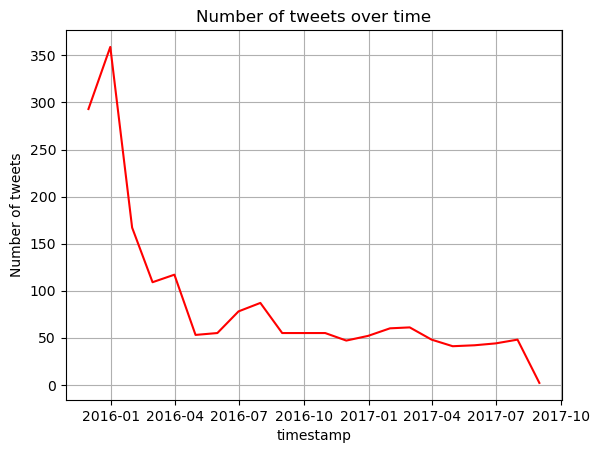

In [137]:
df.timestamp = pd.to_datetime(df['timestamp'])
monthly_tweets = df.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id,color='red')
plt.xlabel('timestamp')
plt.ylabel('Number of tweets')
plt.title('Number of tweets over time')
plt.grid()
plt.show();

Text(0.5, 1.0, 'Proportion of tweets by dog life stage')

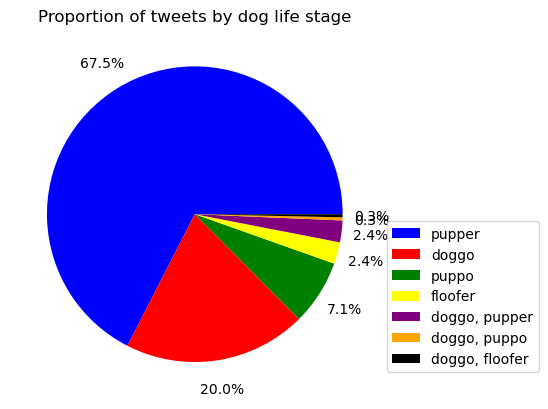

In [153]:
labels = ['pupper','doggo','puppo','floofer','doggo, pupper','doggo, puppo','doggo, floofer']
sizes = [df['stage'].value_counts()['pupper'],df['stage'].value_counts()['doggo'],df['stage'].value_counts()['puppo'],df['stage'].value_counts()['floofer'],df['stage'].value_counts()['doggo, pupper'],df['stage'].value_counts()['doggo, puppo'],df['stage'].value_counts()['doggo, floofer']]
colors = ['blue','red','green','yellow','purple','orange','black']

fig, ax = plt.subplots()
ax.pie(sizes, labels=None,autopct='%1.1f%%',colors=colors,pctdistance=1.2)
plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 0.5))
plt.title('Proportion of tweets by dog life stage')